In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append("../filtering/")

%load_ext autoreload
%autoreload 2

In [3]:
from visualizations import plot_covariance_ellipse
from helpers import vec

[[ 0.         -0.22741092  0.22741092  0.32906576 -0.32906576 -0.45482185
   0.45482185  0.65813151 -0.65813151]
 [ 0.          0.09419669 -0.09419669  0.79443501 -0.79443501  0.18839338
  -0.18839338  1.58887002 -1.58887002]]
[0.11764706 0.14705882 0.14705882 0.14705882 0.14705882 0.07352941
 0.07352941 0.07352941 0.07352941]
[0.16666667 0.13888889 0.13888889 0.13888889 0.13888889 0.06944444
 0.06944444 0.06944444 0.06944444]


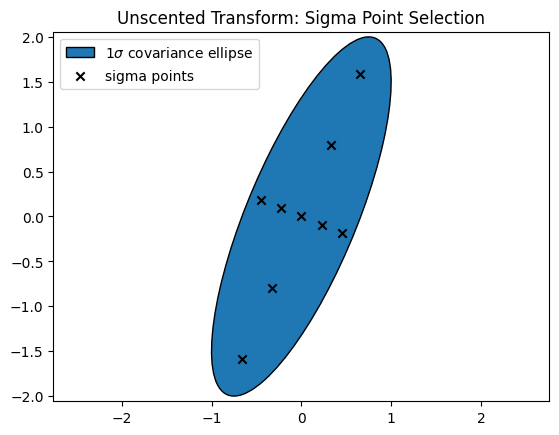

In [12]:
from sigma_points import StandardSigmaPointSelector, MultiShellSigmaPointSelector
from matrix_square_root import *

# selector = StandardSigmaPointSelector(alpha=0.3, mat_sqrt_alg=mat_sqrt_cholesky)
# selector = StandardSigmaPointSelector(alpha=0.5, mat_sqrt_alg=mat_sqrt_eigen)
selector = MultiShellSigmaPointSelector([0.4, 0.8], mat_sqrt_alg=mat_sqrt_eigen)

mean = vec(0, 0)
cov = np.array([
    [1.0, 1.5],
    [1.5, 4.0]
])

sigma_points, weights_mean, weights_cov = selector.select_sigma_points(mean, cov)
print(sigma_points)
print(weights_mean)
print(weights_cov)

plt.title("Unscented Transform: Sigma Point Selection")
plt.axis("equal")
plot_covariance_ellipse(plt.gca(), mean, cov, edgecolor="black", label="$1\sigma$ covariance ellipse")
plt.scatter(sigma_points[0], sigma_points[1], color="black", marker="x", label="sigma points")
plt.legend()

In [9]:
mean_hat = np.sum(weights_mean * sigma_points)
cov_hat = weights_cov * (sigma_points - mean_hat) @ (sigma_points - mean_hat).T

print(mean_hat)
print(cov_hat)

-2.7755575615628914e-17
[[0.2 0.3]
 [0.3 0.8]]
